## Introduction

* A field of artificial intelligence which trains computers to interpret and understand the visual world is known as computer vision. * **Computer vision** tries to replicate the functions of the human vision system to identify and process different objects in images or in videos.  It is one of the most powerful techniques which has been used extensively to detect and label objects in images or in videos. The recent inventions in the field of artificial intelligence have been able to outshine humans in detecting and labeling objects

* Popular **computer vision applications** trying to identifying different things in images or trying to work on the objects such as their lcoation, their type, whether they are present or not; for example:
* **
* Object Classification: What kind of category of object is in a photograph?
* Object Identification: Which type of a given object is in a photograph?
* Object Verification: As the name suggests, is there object in a photograph?
* Object Detection: Where are the objects located in a photograph?
* Object Landmark Detection: What are the key points for the object in a photograph?
* Object Segmentation: What pixels belong to the object in a photograph?
* Object Recognition: What objects are in this photograph and where are they?

* The above are the most popular ones and we will be going with the Face Recognition trying to identifying face of a person in a given image or a video and then trying to classify whose face is it.

* **Face Recognition** is  gaining popularity and even is of good use when an application involves facial recognition such as unlocking phone using face, Facebook is trying to make its algorithm more and more robust where faces will be identified and tagged when multiple people are there in an image.

* **Objective**
* **
The objective of this case study is to understand how to extract frames from a video and train using faces and identify where the classified person is located either in a video or an image.

* **Challenge**
* **
Any object can be seen from different angles, in different lightening conditions such as dark, dim or bright light. If a task involves trying to identifying and recognizing a face of a person from an image then depending on the orientation of a face whether right/left sideways, blurry makes any algoriothm harder to identify and recognize

* **Steps**
* **
* This problem we have solved primarily by making folders of the person we wish to identify in a image or a video
* An extra step has also been shown how to find faces from a raw image and then keeping those images in the respective folders
* How to directly download a video from python library
* How to extract frames/images from a video
* How to train a model using pre-trained facenet model
* How to train a model using vggface achitecture and its model weights - this can be handy if any model is not trained on images we wish to identify
* How to use a google colab
* How to classify person's face in images extracted from a video
* How to classify person's face in video

### Required Dependencies

In [1]:
# python3.6.2
# tensorflow: 1.3.0
# keras: 2.1.2
# pip install h5py==2.10.0

### Libraries Imported

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize

%matplotlib inline

In [6]:
from os.path import isdir
import operator
from os import listdir
from imutils.video import VideoStream
import imutils
from time import time, sleep
writer = None
sleep(2.0)

In [7]:
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.engine import  Model

Using TensorFlow backend.


In [8]:
from PIL import Image
from numpy import asarray, expand_dims, dot
from numpy.linalg import norm
import math
from math import floor

### Facenet

In [10]:
# loading the facenet model
model = models.load_model('../prebuilt_models/facenet_keras.h5')

d:\PROJECTS\face-recog-facenet\modular_code_facenet\facenet_vn\lib\site-packages\keras\models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


* **Facenet** 
* **
Popular face recognition algorithm developed by researchers at Google.
It deals with distances in Euclidean space where far away distances mapped from face images signifies different faces or least similar faces whereas distances that are closer in space indicates there is a high similarity in faces and may be of a single person. 
* **
The output of the model is embeddings and after generating the embeddings, popular applications of CV dealing with faces such as recognition and verification can be ustilised taking the generated embeddings as features to train.

* **Working**
* **
The type of Neural Network it uses backhend is Convolution Neural Network(CNN), a popular NN which gained popularity and good accuracy dealing with images.
* **
CNN layers used to learn different types of representations or features such as edges, where a difference of dark or light pixels are there, take for an eg., there might be dark pixels located in place of nose and then light or less darker elsewhere on cheeks. Such kind of differnces in the intensity of pixels can be easily identified by working of CNN layers.
* **

* Model will expect color images int he square format having shape of (160,160). Output of the model will be embeddings of 1D 128 vectors.
* **

Below are the different types trying to minimize and maximize. These images are of the following three types:
* **
* **anchor**: an image of a random person.
* **positive image**: another image of the same person.
* **negative image** an image of a different person.
* **Two Euclidean distances are measured**: How it will work - one between the anchor and the positive image. Another between the anchor and the negative image. The training process will be in such a way that aims distance between anchor and the psoitive image and will do inversely for the anchor and negative image, such that similar images lie close to each other and distinct images lie far away in the embedding space.

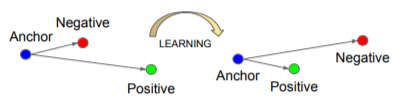

### Haar Cascade

* **OpenCV** is a library of programming functions mainly aimed at real-time computer vision

In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

* It is one of the most popular * **Object Detection Algorithm** used to identify faces in an image or a real time video. It uses edge or line detection features.
* The algorithm has been trained in such a way that positive class corresponds to images having faces and negative class corresponds to images havbing no faces.

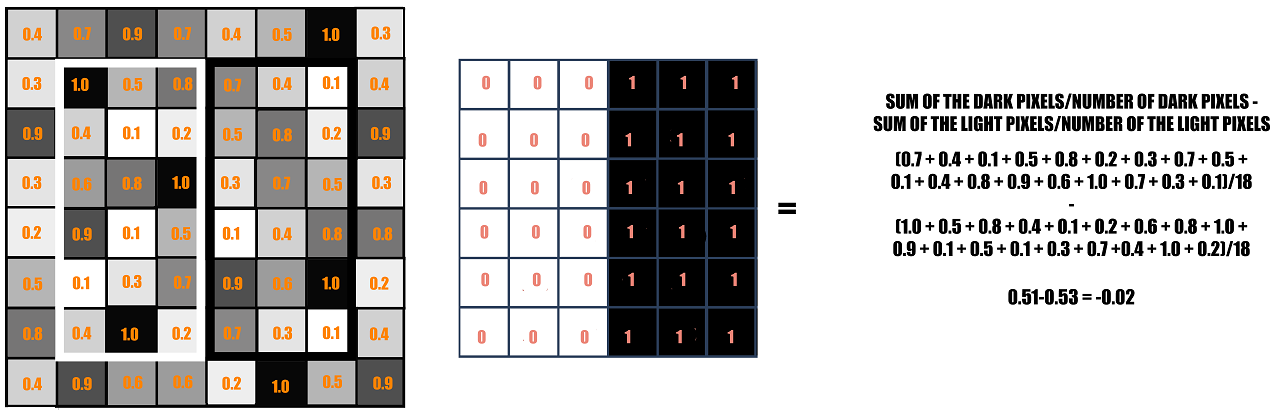

* We are using * **frontal face detection**, there is one for * **left and right eye** and * **mouth** as well

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.svm import SVC

### Downloading a video and converting into frames

In [8]:
# from pytube import YouTube
# https://www.y2mate.com/en68

In [1]:
# video_link = "https://www.youtube.com/watch?v=OcgxHjcvz4Y"
# yt = YouTube(video_link)

In [2]:
# #Title of video
# print("Title: ",yt.title)
# #Number of views of video
# print("Number of views: ",yt.views)
# #Length of the video
# print("Length of video: ",yt.length,"seconds")
# #Description of video
# print("Description: ",yt.description)
# #Rating
# print("Ratings: ",yt.rating)

In [3]:
# print(yt.streams.filter(progressive=True))
# stream = yt.streams.get_by_itag('22')

# # stream = vid.streams.get_highest_resolution()
# stream.download()

* Making a folder in the name of * **frames_path** where frames extracted from a video will be kept 

In [14]:
try:
    if not os.path.exists('../input/frames_path'):
        os.makedirs('../input/frames_path')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

In [15]:
base_path = '../'
frame_path = '../input/frames_path/'

#### Extracting frames per second from a video

In [17]:
if len(os.listdir('../input/frames_path')) == 0:
    count = 0
    file = "Friends - Monica and Chandler's Wedding, Part 1 _ 5.mp4"
    video_object = cv2.VideoCapture(file)  
    rate_of_frame = video_object.get(5) 

    while(video_object.isOpened()):
        frame_id = video_object.get(1)
        content, frame = video_object.read()
        if (content != True):
            break
        if (frame_id % floor(rate_of_frame) == 0):
            filename ="frame%d.jpg" % count;count+=1
            cv2.imwrite(base_path+frame_path+filename, frame)
    video_object.release()
    print ("Done!")
    
else:    
    print("Directory is not empty")

Directory is not empty


* **Face extraction**
* **
* Image is loaded into the object image by using cv2 attribute imread
* Reading image in BGR format and then converting into RGB(Red Green Blue) format
* Using Harr cascade, we can make predictions with it using the * **detectMultiScale** function
* **scaleFactor** – Parameter specifying how much the image size is reduced at each image scale.
* **minNeighbors** – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
* **minSize** – Minimum possible object size. Objects smaller than that are ignored

* The result is a list of * **bounding boxes** that contain the starting x and y coordinates of the bounding box, along with their width (w) and height (h).



In [18]:
def face_extract_using_CV(path):
    
    image = cv2.imread(path)
    color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    faces = faceCascade.detectMultiScale(
    color,
    scaleFactor=1.2,
    minNeighbors=10,
    minSize=(64,64),
    flags=cv2.CASCADE_SCALE_IMAGE
    )
    
    return image, faces

#### Take every pic from the respective folders and modify them as per the model requirements

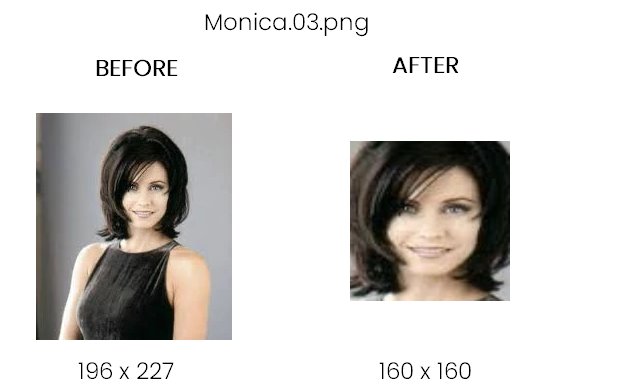

* Image will be resized to the required size which is (160,160) in our case and output returned will be (160,160,3)

In [19]:
def resize_face(filename, size):
    
    image = cv2.imread(filename)
    resize_image = resize(image, size)
    pixels = asarray(resize_image)
    return pixels

* Taking each face image from a folder and passing into resize face function so each image can be resized as per the requirement and appending arrays of those pixels in a list.

In [20]:
def faces_from_folders(folder, size):
    
    extracted_faces = []
    
    for filename in listdir(folder):
        image_path = folder + filename
        face = resize_face(image_path, size)
        extracted_faces.append(face)
        
    return extracted_faces

* The below function is taking each face from each character's folders and the same function will be called for train and validation data

In [21]:
def loading_images(folder, size):
    X = [] ; y = []
    
    for sub_folder in listdir(folder):
        
        image_path = folder + sub_folder + '/'
        faces = faces_from_folders(image_path, size)
        labels = [sub_folder for _ in range(len(faces))]
        
        print('Loaded %d samples for character: %s' % (len(faces), sub_folder))
        
        X.extend(faces)
        y.extend(labels)

    return asarray(X), asarray(y)

In [23]:
# load train dataset
X_train, y_train = loading_images("../input/train/", (160,160))
print(X_train.shape, y_train.shape)

Loaded 7 samples for character: chandler
Loaded 7 samples for character: monica
Loaded 7 samples for character: phoebe
Loaded 7 samples for character: rachael
Loaded 7 samples for character: ross
(35, 160, 160, 3) (35,)


In [24]:
# load test dataset
X_test, y_test = loading_images("../input/val/", (160,160))
print(X_test.shape, y_test.shape)

Loaded 3 samples for character: chandler
Loaded 3 samples for character: monica
Loaded 3 samples for character: phoebe
Loaded 3 samples for character: rachael
Loaded 3 samples for character: ross
(15, 160, 160, 3) (15,)


### Extracting embedding and normalizing as per the model requirements

* To predict an embedding for each facer image , the pixel values should be modified in such a way that feeding into the model to extract embeddings is acceptable. 

* Mean and standarad deviation is calculated across 3 channels that are Red, Green, and Blue.
* Subtracting each pixel from its mean and dividing by its standarad deviation is the process of Standaradizing the pixels.
* Using numpy expand_dims, each image is transformed into 1 single sample
* At last, facent model is used to predict 1D 128 embeddings.

In [25]:
def embedding_generation_from_facenet(model, pixels):

    pixels            = pixels.astype('float32')
    pixels_mean       = np.mean(pixels)
    pixels_deviation  = np.std(pixels)
    normalized_pixels = (pixels - pixels_mean) / pixels_deviation
    transformed_pixel = expand_dims(normalized_pixels, axis=0)
    embeddings = model.predict(transformed_pixel)
    
    return embeddings[0]

* The above operation is done for each training and validation images using the below function

In [26]:
def embedded_array(array_data):
    
    embedding_list = []
    for face_pixels in array_data:
        embedding = embedding_generation_from_facenet(model, face_pixels)
        embedding_list.append(embedding)
    embedding_list = asarray(embedding_list)
    print(embedding_list.shape)
    
    return embedding_list

In [27]:
X_train_embedded = embedded_array(X_train)

X_test_embedded = embedded_array(X_test)

(35, 128)
(15, 128)


* Now, lets pre process our generated embeddings prior to feeding into our Machine Learning Model
* It makes model training more better and achieves good accuracy when vectors are normalized as those vectors can be of any magnitude and also vectors will be compared using some distance metric
* We are using L2 normalizer to normalize embeddings, **L2 normalization** may be defined as the normalization technique that modifies the dataset values in a way that in each row the sum of the squares will always be up to 1. It is also called least squares.

In [28]:
l2_encoder = Normalizer(norm='l2')

In [29]:
def vectorize_vectors(encoder, dataX):
    
    normalized_data = []
    for data_x in dataX:
        normalized_data.append(encoder.transform(data_x))
    
    return normalized_data

* Extracted embeddings are being normalized using L2 normalizer for training and validation images

In [30]:
vectorized_data = vectorize_vectors(l2_encoder, [X_train_embedded, X_test_embedded])
normalized_train = vectorized_data[0]
normalized_test  = vectorized_data[1]

print(normalized_train.shape, normalized_test.shape)

(35, 128) (15, 128)


* the string target variables for each celebrity name need to be converted to integers

In [31]:
def encode_target(datay1, datay2):

    label_encoder = LabelEncoder()
    label_encoder.fit(datay1)
    datay1_train  = label_encoder.transform(datay1)
    datay2_test   = label_encoder.transform(datay2)
    
    return label_encoder, datay1_train, datay2_test

In [32]:
label_encoder, encoded_train, encoded_test = encode_target(y_train, y_test)

### Fitting the model and checking

* Using * **Support Vector Machine (SVM)**  as it performs good when working with normalized face embedding. 

In [33]:
# fit model
ml_model = SVC(kernel='linear', probability=True)
ml_model.fit(normalized_train, encoded_train)

SVC(kernel='linear', probability=True)

In [34]:
# predict
predictions_train = ml_model.predict(normalized_train)
predictions_test  = ml_model.predict(normalized_test)

In [35]:
print('accuracy score : ', accuracy_score(predictions_test, encoded_test))

accuracy score :  1.0


* Visualizing normalized embeddings in 2D space using * **TSNE** t-Stochastic Neighbor Embeddings

In [36]:
targets = label_encoder.inverse_transform(encoded_train)

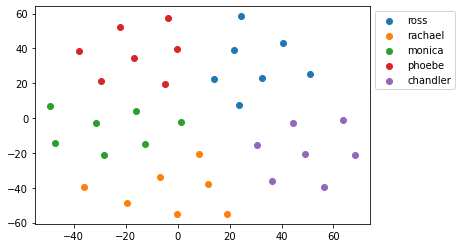

In [37]:
train_embedded = TSNE(n_components=2).fit_transform(normalized_train)

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(train_embedded[idx, 0], train_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));

In [38]:
label_map = {}
for index,name in enumerate(label_encoder.classes_):
    label_map[index] = name
    
label_map

{0: 'chandler', 1: 'monica', 2: 'phoebe', 3: 'rachael', 4: 'ross'}

### Testing on frames and predicting faces 

In [39]:
def plot(img):
    plt.figure(figsize=(8,4))
    plt.imshow(img[:,:,::-1])
    plt.show()

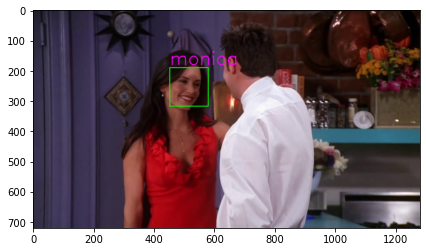

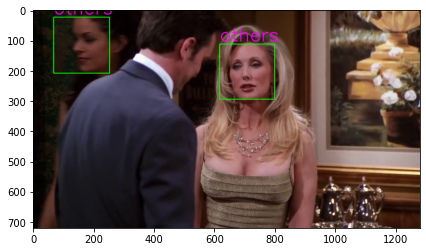

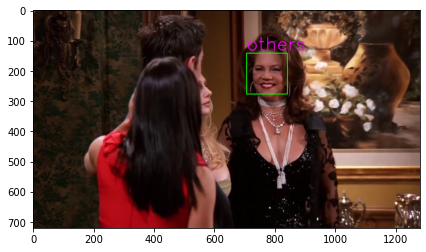

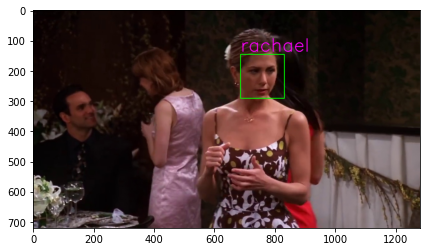

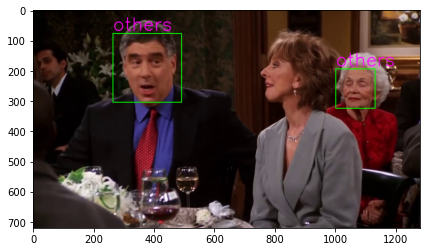

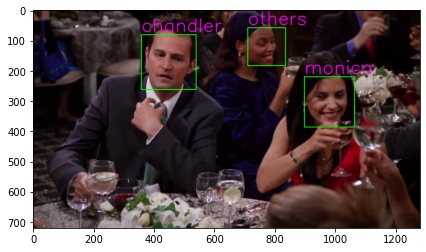

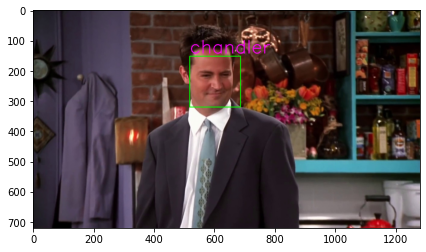

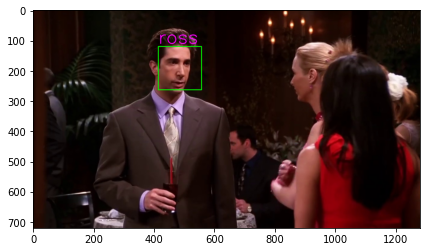

In [41]:
folder = '../input/test_frames/'
size = (160,160)

for filename in listdir(folder):
    # path
    frame_path = folder + filename
    image, faces = face_extract_using_CV(frame_path)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_color = image[y:y + h, x:x + w]
        res_img   = resize(roi_color,size)
        pixels    = asarray(res_img)
        embed     = embedding_generation_from_facenet(model, pixels)
        norm_vec  = l2_encoder.transform(np.expand_dims(embed,axis=0))
        per_prob  = ml_model.predict_proba(norm_vec)[0]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        if np.max(per_prob) >=0.5:
            name=label_map[np.argmax(per_prob)]
            img=cv2.putText(image,name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,255),2,cv2.LINE_AA)
        else:
            img=cv2.putText(image,'others',(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,255),2,cv2.LINE_AA)

    cv2.imwrite(folder+frame_path.split('/')[-1].split('.')[0]+'_facenet_pred.jpg',image) 
    plot(image)


### Predicitng on a video directly

In [43]:
size = (160,160)
video_object = cv2.VideoCapture("../input/video/Friends - Monica and Chandlers Wedding.mp4")  

if (video_object.isOpened()== False): 
    print("Error opening video  file")

while(video_object.isOpened()):      

    content, frame = video_object.read()
    if content == True:
        color = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)        
        faces = faceCascade.detectMultiScale(
            color,
            scaleFactor=1.2,
            minNeighbors=10,
            minSize=(64, 64),
            flags=cv2.cv2.CASCADE_SCALE_IMAGE
        )

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            roi_color = frame[y:y + h, x:x + w]
            res_img   = resize(roi_color,size)
            pixels    = asarray(res_img)
            embed     = embedding_generation_from_facenet(model, pixels)
            norm_vec  = l2_encoder.transform(np.expand_dims(embed,axis=0))
            per_prob  = ml_model.predict_proba(norm_vec)[0]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            if np.max(per_prob) >=0.5:
                name=label_map[np.argmax(per_prob)]
                img=cv2.putText(frame,name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,255),2,cv2.LINE_AA)

            else:
                img=cv2.putText(frame,'others',(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,255),2,cv2.LINE_AA)

        cv2.imshow('Video', frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else: 
        break

video_object.release()

# Closes all the frames
cv2.destroyAllWindows()